<h1 style = "color: green"> Esercitazione 6 </h1>

<h3 style = "color: blue"> Esercizio 6.1 </h3>

In questa esercitazione vogliamo applicare l'algoritmo di Metropolis e quello di Gibbs per risolvere un modello di Ising monodimensionale con $N=50$ spin con le condizioni al contorno periodiche. Questi due algoritmi ci permettono, in questo caso, di campionare i pesi di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$, dove $\{ s_i \}$ è l'insieme degli spin considerati, con $s_i=\pm 1$.  
L'hamiltoniana del sistema è
$$H = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$
con $J=1$ e $h$ è il campo magnetico esterno. Assumiamo $k _B=1$ e $\mu _B=1$.  
Il modello di Ising 1D può essere risolto esattamente, quindi possiamo confrontare i risultati della simulazione con le soluzioni analitiche. 

Vogliamo calcolare:
- l'energia interna: $U(N,T) = \langle H \rangle_{h=0}$
- la capacità termica: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
- la suscettività magnetica: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
- la magnetizzazione: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

in funzione della temperatura $T \in \left[0.5,2.0\right]$.  

Con entrambi gli algoritmi, per prima cosa dovremo termalizzare il sistema, poiché parte sempre da $T=+\infty$. Infatti all'inizio di ogni simulazione generiamo casualmente i valori degli spin con uguale probabilità per i due valori possibili. Il tempo di equilibrazione per il sistema a $T=0.5$ sarà quindi quello maggiore, e useremo, per semplicità, lo stesso numero $N_{term}$ di passi per tutte le altre temperature, anche se ne basterebbero meno.  
Potremmo termalizzare separatamente ogni temperatura e ripartire ogni volta dalla configurazione salvata, ma questa simulazione è molto veloce, quindi è più conveniente simulare $N_{term}$ passi prima di iniziare la misurazione.

Una mossa dell'algoritmo di Metropolis consiste nel tentare di invertire $N=50$ spin casuali.  

Di seguito è riportato il grafico dell'andamento istantaneo dell'energia interna $U/N$ che analizziamo per ricavare il numero di passi necessari a termalizzare il sistema.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def loadIstant(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    fileLength = len(lines)
    data = np.empty(fileLength)
    for i in range(fileLength):
        values = lines[i].split()
        data[i] = float(values[1])

    dataFile.close()

    return data, fileLength

In [2]:
# plot data to visualize the thermalization of the system
def plotTherm(name, T, title):
    # variables for the exact solution
    beta = 1/T
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th


    data, fileLength = loadIstant(name)
    x = np.arange(fileLength)


    plt.plot(x, data, label = "valore istantaneo di U/N")
    plt.title("Termalizzazione a T = %.1f" % T + " con l'algoritmo di " + title)
    plt.xlabel("#passo")
    plt.ylabel("U/N")

    e = -J*( th + ch*thN )/( 1 + thN )
    plt.axhline(e, color = "#d82786", label = "valore esatto a T = %.1f" % T)


    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return

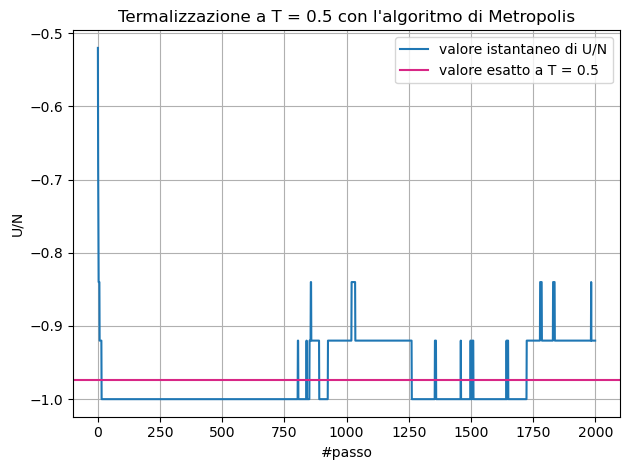

In [3]:
plotTherm("code/metro/therm_0.5.dat", 0.5, "Metropolis")

Le oscillazioni del valore istantaneo di $U$ possono essere solo discrete, quindi il sistema sembra termalizzato già dopo pochi passi anche se $U/N=-1$ non è il valore atteso.  

Visto che il codice per questa simulazione è molto veloce, possiamo prendere come tempo di termalizzazione $N_{term}=2000$ passi per ogni temperatura, anche se probabilmente ne basterebbero molti meno.  

A temperature maggiori il sistema raggiunge l'equilibrio in tempi più brevi, come è evidente già per $T=0.6$, il cui grafico è riportato di seguito.

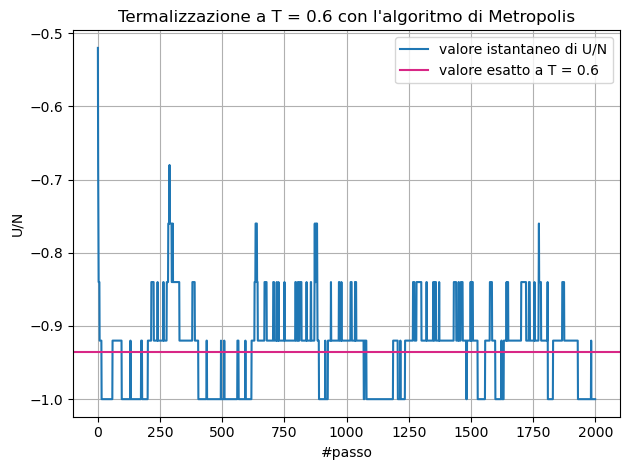

In [4]:
plotTherm("code/metro/therm_0.6.dat", 0.6, "Metropolis")

Un passo dell'algoritmo di Gibbs consiste nello scegliere il valore di una spin casuale in base a tutti gli altri, per $N=50$ volte. Ogni mossa viene quindi accettata, anche se non è detto che inverta lo spin.  

Ripetiamo la stessa analisi del caso precedente per l'equilibrazione del sistema usando l'algoritmo di Gibbs.

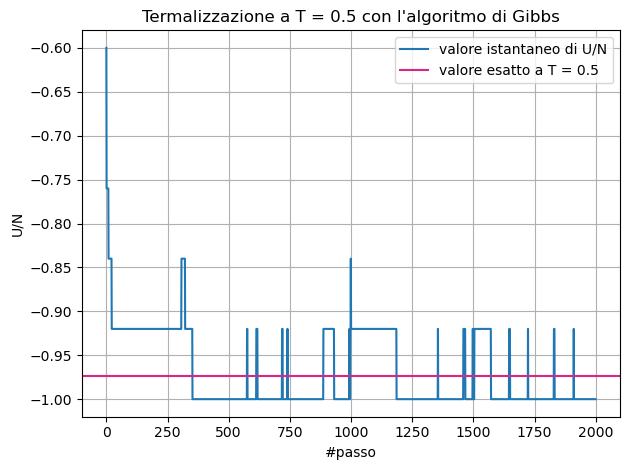

In [5]:
plotTherm("code/gibbs/therm_0.5.dat", 0.5, "Gibbs")

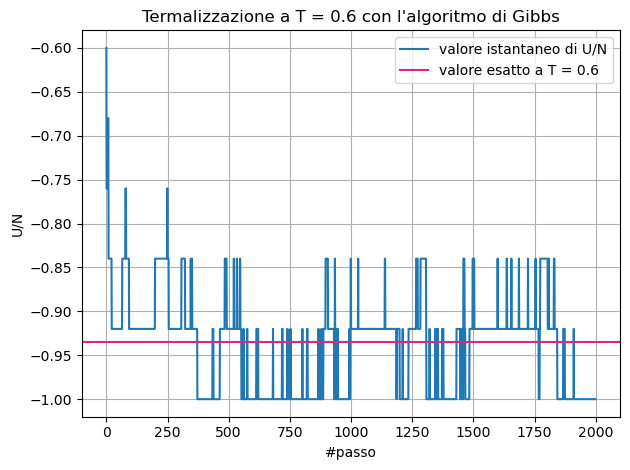

In [6]:
plotTherm("code/gibbs/therm_0.6.dat", 0.6, "Gibbs")

Anche in questo caso usiamo $N_{term}=2000$ passi, anche se ne basterebbero meno.  

<h4> Analisi dei risultati </h4>

Dividiamo l'intervallo di temperature $T \in \left[0.5,2.0\right]$ in modo da misurare le quantità di interesse ogni $\Delta T=0.1$, cioè in 15 intervalli, ed effettuiamo le 16 simulazioni.  
Per le temperature basse, notiamo un tasso di accettazione molto basso per l'algoritmo di Metropolis, minore del $10\%$: questo accade perché il sistema è più stabile mantenendo molti spin allineati, e la maggior parte delle mosse consiste nell'invertirne uno già allineato. 
 
I risultati sono ottenuti simulando, per ogni temperatura, 100 blocchi da $10^5$ passi. I grafici dei valori ottenuti in funzione della temperatura sono riportati di seguito, per entrambi gli algoritmi, comparati con la curva analitica.

In [7]:
# loads data file (temperature, final value, uncertainty)
def loadFile(name):
    dataFile = open(name, "r")
    lines = dataFile.readlines()
    fileLength = len(lines)
    temp = np.empty(fileLength)
    mean = np.empty(fileLength)
    uncertainty = np.empty(fileLength)
    
    for i in range(fileLength):
        values = lines[i].split()
        temp[i], mean[i], uncertainty[i] = float(values[0]), float(values[1]), float(values[2])

    dataFile.close()

    return temp, mean, uncertainty, fileLength

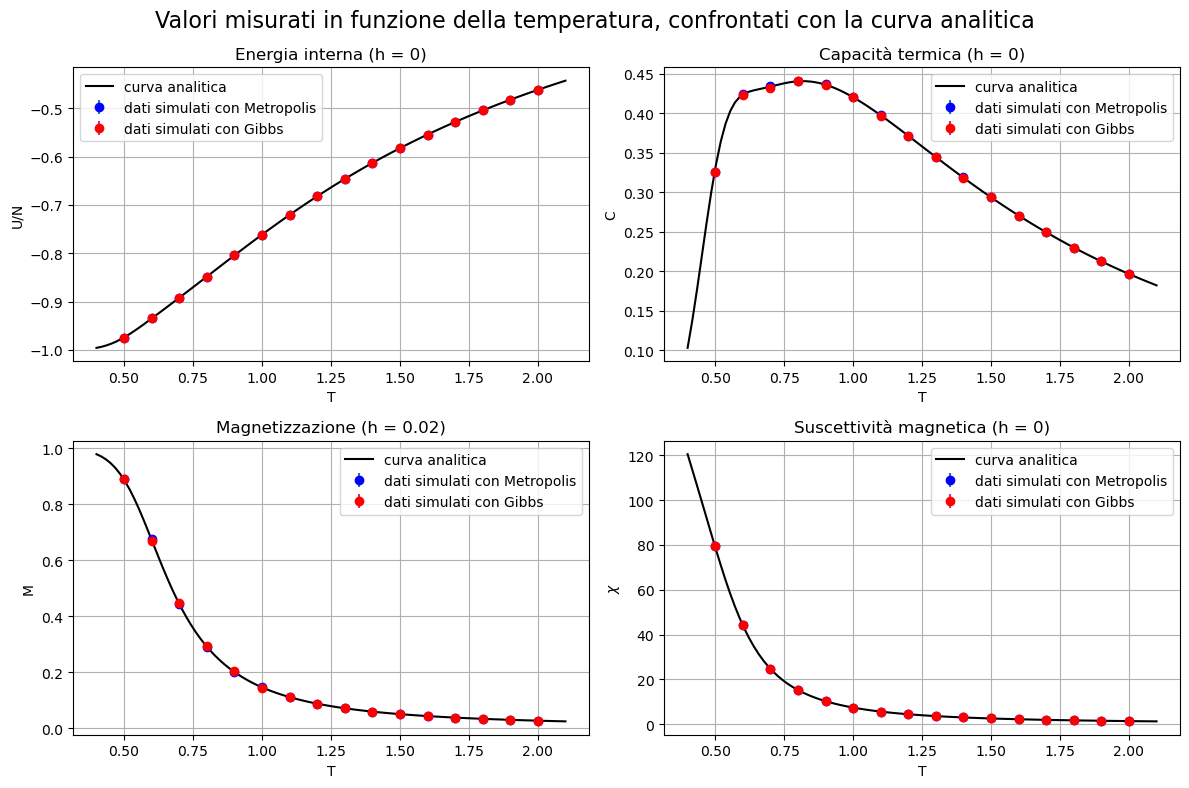

In [8]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8))


points=100
T = np.linspace(0.4, 2.1, num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN )
ax[0, 0].plot(T, e, color = "black", label = "curva analitica")


heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
ax[0, 1].plot(T, heat, color = "black", label = "curva analitica")


h=0.02 # external field

l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**Ns + l2**Ns
M = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)
ax[1, 0].plot(T, M, color = "black", label = "curva analitica")


X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
ax[1, 1].plot(T, X, color = "black", label = "curva analitica")



# Metropolis
path = "code/metro/"

# energy
temp, mean, uncertainty, fileLength = loadFile(path + "output.ene.final")

ax[0, 0].errorbar(temp, mean, yerr = uncertainty, fmt = "o", color = "blue", ecolor = "#1f77b4", label = "dati simulati con Metropolis")
ax[0, 0].set(title = "Energia interna (h = 0)", xlabel = "T", ylabel = "U/N")


# heat capacity
temp, mean, uncertainty, fileLength = loadFile(path + "output.heat.final")

ax[0, 1].errorbar(temp, mean, yerr = uncertainty, fmt = "o", color = "blue", ecolor = "#1f77b4", label = "dati simulati con Metropolis")
ax[0, 1].set(title = "Capacità termica (h = 0)", xlabel = "T", ylabel = "C")


# magnetization
temp, mean, uncertainty, fileLength = loadFile(path + "output.mag.final")

ax[1, 0].errorbar(temp, mean, yerr = uncertainty, fmt = "o", color = "blue", ecolor = "#1f77b4", label = "dati simulati con Metropolis")
ax[1, 0].set(title = "Magnetizzazione (h = 0.02)", xlabel = "T", ylabel = "M")


# magnetic susceptibility
temp, mean, uncertainty, fileLength = loadFile(path + "output.chi.final")

ax[1, 1].errorbar(temp, mean, yerr = uncertainty, fmt = "o", color = "blue", ecolor = "#1f77b4", label = "dati simulati con Metropolis")
ax[1, 1].set(title = "suscettività magnetica (h = 0)", xlabel = "T", ylabel = "$\chi$")



# Gibbs
path = "code/gibbs/"

# energy
temp, mean, uncertainty, fileLength = loadFile(path + "output.ene.final")

ax[0, 0].errorbar(temp, mean, yerr = uncertainty, fmt = "o", color = "red", ecolor = "#d82786", label = "dati simulati con Gibbs")
ax[0, 0].set(title = "Energia interna (h = 0)", xlabel = "T", ylabel = "U/N")


# heat capacity
temp, mean, uncertainty, fileLength = loadFile(path + "output.heat.final")

ax[0, 1].errorbar(temp, mean, yerr = uncertainty, fmt = "o", color = "red", ecolor = "#d82786", label = "dati simulati con Gibbs")
ax[0, 1].set(title = "Capacità termica (h = 0)", xlabel = "T", ylabel = "C")


# magnetization
temp, mean, uncertainty, fileLength = loadFile(path + "output.mag.final")

ax[1, 0].errorbar(temp, mean, yerr = uncertainty, fmt = "o", color = "red", ecolor = "#d82786", label = "dati simulati con Gibbs")
ax[1, 0].set(title = "Magnetizzazione (h = 0.02)", xlabel = "T", ylabel = "M")


# magnetic susceptibility
temp, mean, uncertainty, fileLength = loadFile(path + "output.chi.final")

ax[1, 1].errorbar(temp, mean, yerr = uncertainty, fmt = "o", color = "red", ecolor = "#d82786", label = "dati simulati con Gibbs")
ax[1, 1].set(title = "Suscettività magnetica (h = 0)", xlabel = "T", ylabel = "$\chi$")



ax[0, 0].grid(True)
ax[0, 0].legend()

ax[0, 1].grid(True)
ax[0, 1].legend()

ax[1, 0].grid(True)
ax[1, 0].legend()

ax[1, 1].grid(True)
ax[1, 1].legend()



fig.suptitle("Valori misurati in funzione della temperatura, confrontati con la curva analitica", fontsize = 16)
fig.tight_layout()
plt.show()

I dati simulati seguono molto bene la curva analitica, ma le differenze tra i due metodi e le incertezze sono troppo piccole per essere visulizzate qui. Grafichiamo quindi la differenza tra valori misurati ed esatti.

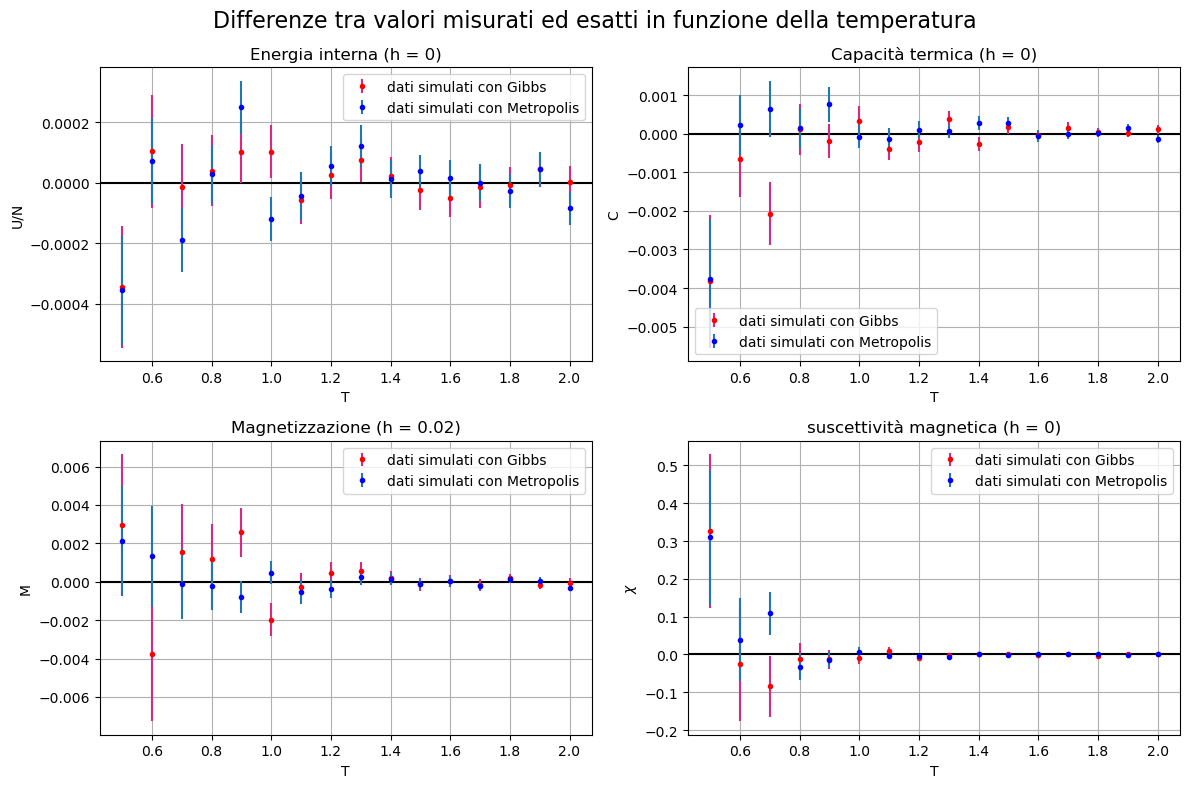

In [9]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8))


# exact curve
points=16
T = np.linspace(0.5, 2, num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN )
ax[0, 0].axhline(0, color = "black")


heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
ax[0, 1].axhline(0, color = "black")


h=0.02 # external field

l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**Ns + l2**Ns
M = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)
ax[1, 0].axhline(0, color = "black")


X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
ax[1, 1].axhline(0, color = "black")



# Gibbs
path = "code/gibbs/"

# energy
temp, mean, uncertainty, fileLength = loadFile(path + "output.ene.final")

ax[0, 0].errorbar(temp, mean - e, yerr = uncertainty, fmt = ".", color = "red", ecolor = "#d82786", label = "dati simulati con Gibbs")
ax[0, 0].set(title = "Energia interna (h = 0)", xlabel = "T", ylabel = "U/N")


# heat capacity
temp, mean, uncertainty, fileLength = loadFile(path + "output.heat.final")

ax[0, 1].errorbar(temp, mean - heat, yerr = uncertainty, fmt = ".", color = "red", ecolor = "#d82786", label = "dati simulati con Gibbs")
ax[0, 1].set(title = "Capacità termica (h = 0)", xlabel = "T", ylabel = "C")


# magnetization
temp, mean, uncertainty, fileLength = loadFile(path + "output.mag.final")

ax[1, 0].errorbar(temp, mean - M, yerr = uncertainty, fmt = ".", color = "red", ecolor = "#d82786", label = "dati simulati con Gibbs")
ax[1, 0].set(title = "Magnetizzazione (h = 0.02)", xlabel = "T", ylabel = "M")


# magnetic susceptibility
temp, mean, uncertainty, fileLength = loadFile(path + "output.chi.final")

ax[1, 1].errorbar(temp, mean - X, yerr = uncertainty, fmt = ".", color = "red", ecolor = "#d82786", label = "dati simulati con Gibbs")
ax[1, 1].set(title = "Suscettività magnetica (h = 0)", xlabel = "T", ylabel = "$\chi$")



# Metropolis
path = "code/metro/"

# energy
temp, mean, uncertainty, fileLength = loadFile(path + "output.ene.final")

ax[0, 0].errorbar(temp, mean - e, yerr = uncertainty, fmt = ".", color = "blue", ecolor = "#1f77b4", label = "dati simulati con Metropolis")
ax[0, 0].set(title = "Energia interna (h = 0)", xlabel = "T", ylabel = "U/N")


# heat capacity
temp, mean, uncertainty, fileLength = loadFile(path + "output.heat.final")

ax[0, 1].errorbar(temp, mean - heat, yerr = uncertainty, fmt = ".", color = "blue", ecolor = "#1f77b4", label = "dati simulati con Metropolis")
ax[0, 1].set(title = "Capacità termica (h = 0)", xlabel = "T", ylabel = "C")


# magnetization
temp, mean, uncertainty, fileLength = loadFile(path + "output.mag.final")

ax[1, 0].errorbar(temp, mean - M, yerr = uncertainty, fmt = ".", color = "blue", ecolor = "#1f77b4", label = "dati simulati con Metropolis")
ax[1, 0].set(title = "Magnetizzazione (h = 0.02)", xlabel = "T", ylabel = "M")


# magnetic susceptibility
temp, mean, uncertainty, fileLength = loadFile(path + "output.chi.final")

ax[1, 1].errorbar(temp, mean - X, yerr = uncertainty, fmt = ".", color = "blue", ecolor = "#1f77b4", label = "dati simulati con Metropolis")
ax[1, 1].set(title = "suscettività magnetica (h = 0)", xlabel = "T", ylabel = "$\chi$")



ax[0, 0].grid(True)
ax[0, 0].legend()

ax[0, 1].grid(True)
ax[0, 1].legend()

ax[1, 0].grid(True)
ax[1, 0].legend()

ax[1, 1].grid(True)
ax[1, 1].legend()



fig.suptitle("Differenze tra valori misurati ed esatti in funzione della temperatura", fontsize = 16)
fig.tight_layout()
plt.show()

Da questi grafici concludiamo che i dati simulati sono quasi sempre compatibili con i valori esatti (cioè si trovano entro due volte l'incertezza dal valore esatto).  
Le incertezze dei dati simulati con l'algoritmo di Metropolis sono leggermente inferiori, ma nessuno dei due metodi sembra essere migliore dell'altro.